In [10]:
from matplotlib import pyplot as plt
import librosa.display
import librosa.feature
import numpy as np

In [11]:
from ipynb.fs.full.preparation import get_audio_path, get_librosa_audio

audio_paths = get_audio_path()
audio_librosa = get_librosa_audio()

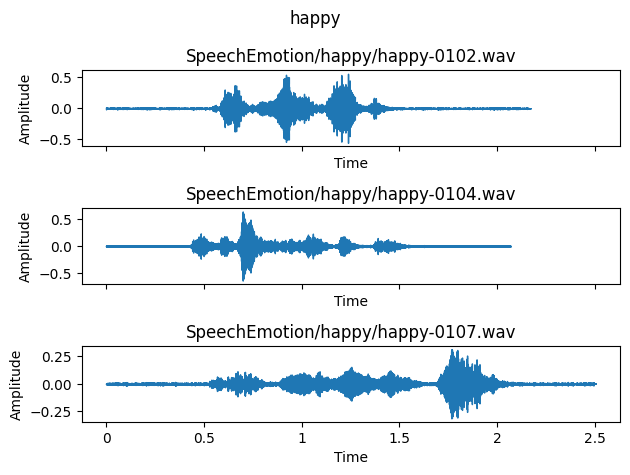

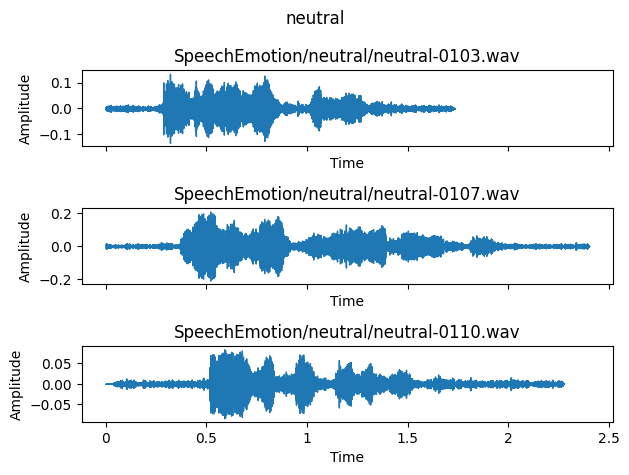

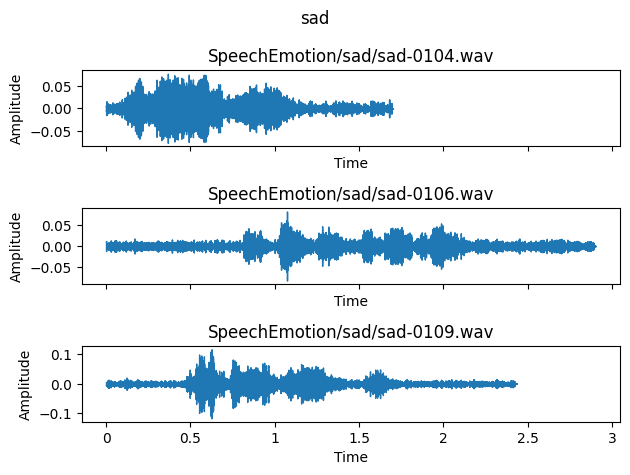

In [12]:
def diplay_amplitude_time(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_ylabel('Amplitude')
        ax[i].set_title(audio_paths[emotion][i])
        librosa.display.waveshow(y = wave[0], sr = wave[1], ax = ax[i])
    fig.tight_layout()
    
for key, values in audio_librosa.items():
    diplay_amplitude_time(key, values)

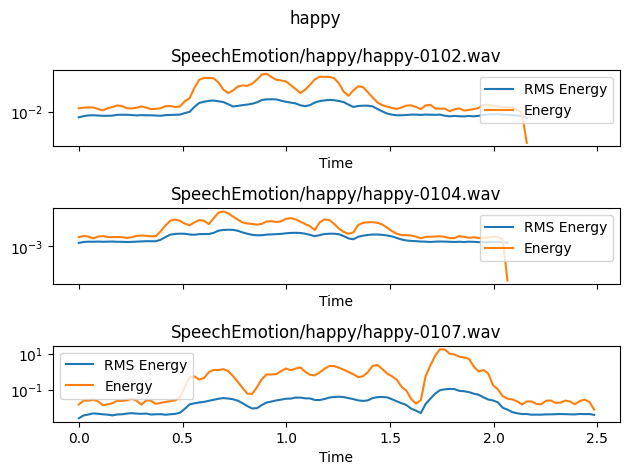

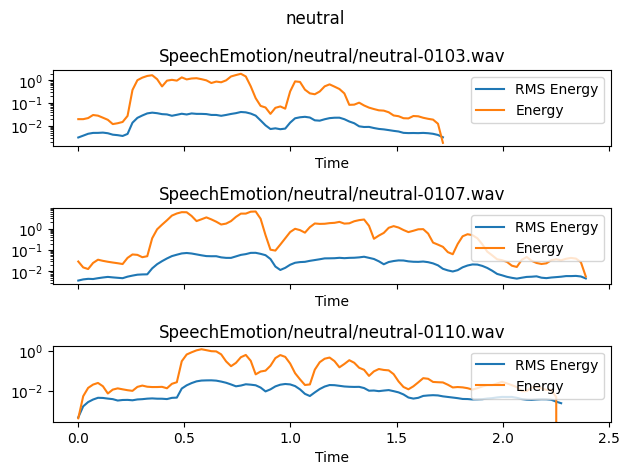

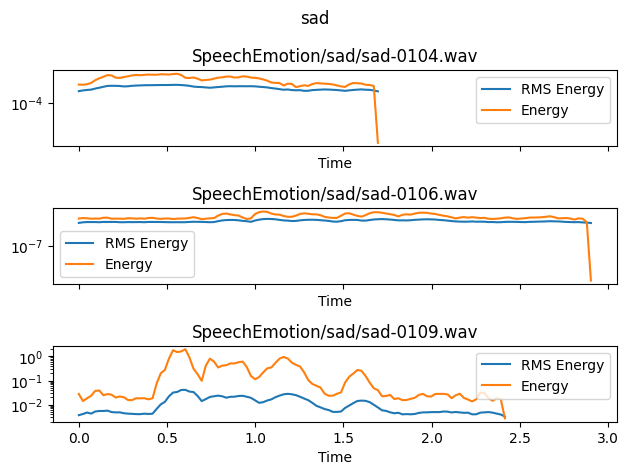

In [13]:
def energy(wave):
    hop_length = 512
    frame_length = hop_length * 2

    energy = np.array([
            sum(abs(wave[j:j + frame_length] ** 2))
            for j in range(0, len(wave), hop_length)
        ])
    return energy

def rms_energy(wave):
    rms = librosa.feature.rms(y = wave)
    return rms

def display_energy(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_title(audio_paths[emotion][i])

        e = energy(wave[0])
        rmse = rms_energy(wave[0])
        times = librosa.times_like(rmse)

        ax[i].semilogy(times, rmse[0], label = 'RMS Energy')
        ax[i].semilogy(times, e, label = 'Energy')
        ax[i].legend()
        ax[i].set_xlabel('Time')
        
    fig.tight_layout()

for key, values in audio_librosa.items():
    display_energy(key, values)

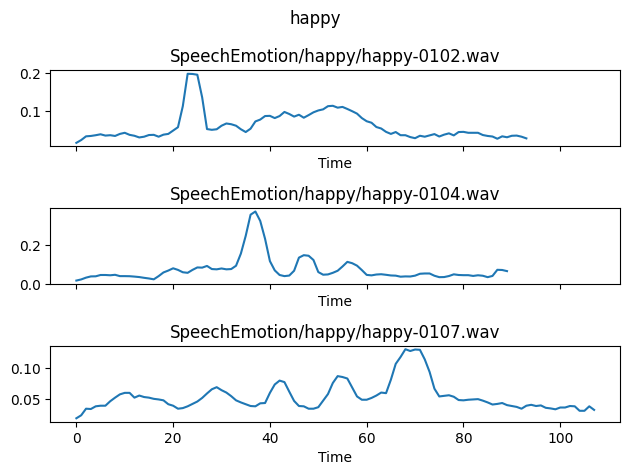

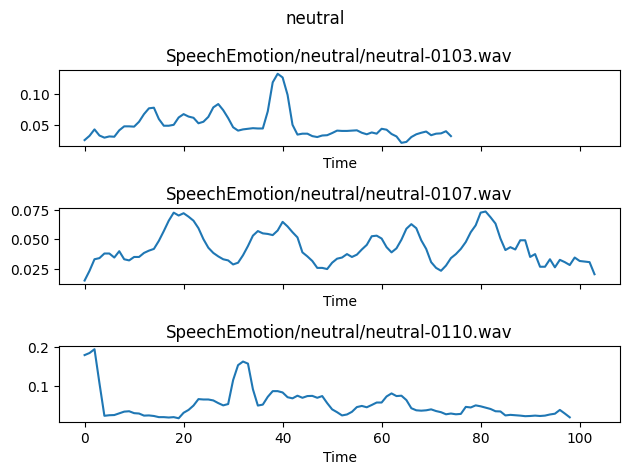

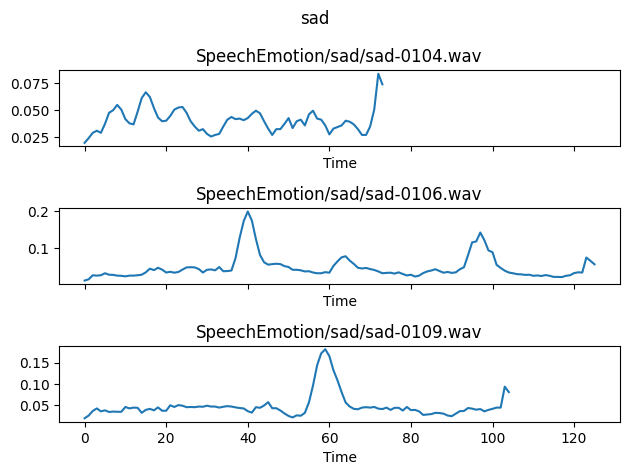

In [14]:
def zero_crossing_rate(wave):
    zcr = librosa.feature.zero_crossing_rate(wave)
    return zcr

def display_zcr(emotion, waves):
    fig, ax = plt.subplots(nrows = len(waves), ncols = 1, sharex = True)
    fig.suptitle(emotion)
    for i, wave in enumerate(waves):
        ax[i].set_title(audio_paths[emotion][i])

        zcr = zero_crossing_rate(wave[0])[0]

        ax[i].plot(zcr)
        ax[i].set_xlabel('Time')
    fig.tight_layout()

for key, values in audio_librosa.items():
    display_zcr(key, values)

In [15]:
def silence_ratio(wave):
    rms = rms_energy(wave)[0]
    threshold = 0.01

    num_silence_frame = np.sum(rms < threshold)
    total_frame = len(rms)

    silence_ratio = num_silence_frame / total_frame
    return silence_ratio

for key, values in audio_librosa.items():
    print(key.upper())
    for i, value in enumerate(values):
        print(audio_paths[key][i], end = ' => ')
        print(silence_ratio(value[0]))
    print()

HAPPY
SpeechEmotion/happy/happy-0102.wav => 0.574468085106383
SpeechEmotion/happy/happy-0104.wav => 0.4666666666666667
SpeechEmotion/happy/happy-0107.wav => 0.42592592592592593

NEUTRAL
SpeechEmotion/neutral/neutral-0103.wav => 0.44
SpeechEmotion/neutral/neutral-0107.wav => 0.33653846153846156
SpeechEmotion/neutral/neutral-0110.wav => 0.6363636363636364

SAD
SpeechEmotion/sad/sad-0104.wav => 0.4189189189189189
SpeechEmotion/sad/sad-0106.wav => 0.6587301587301587
SpeechEmotion/sad/sad-0109.wav => 0.5904761904761905

